# Detección de anomalías One-Class
## Grado en Ingeniería Informática. Universidad de Burgos
**Autor:** Alicia Olivares Gil

In [1]:
%matplotlib inline 
#para dibujar en el propio notebook
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
import matplotlib.pyplot as plt #matplotlib.pyplot como plot
import pickle as pk
import loadData as ld

## Leer datos: 

In [2]:
with open('trozos_limpios.pkl','rb') as f: 
    trozos_limpios = pk.load(f) 

print(len(trozos_limpios))

91


In [ ]:
#buscar días con ataque

indices=[]

for i in range(len(trozos_limpios)): 
    for index, row in trozos_limpios[i].iterrows(): 
        if(row['target'] == True): 
            indices.append(i)
            break; 

In [ ]:
indices

In [4]:
diacrisis1 = trozos_limpios[70]
diacrisis1.head()

,DateTime,P1,P2,P3,P4,P5,P6,target
3849685,2018-11-09 21:03:27,4.098361,18.852459,22.131148,22.131148,13.114754,6.557377,False
3849686,2018-11-09 21:03:27,4.098361,18.852459,21.311475,22.131148,13.114754,6.557377,False
3849687,2018-11-09 21:03:28,4.918033,19.672131,22.131148,22.950820,13.934426,7.377049,False
3849688,2018-11-09 21:03:29,4.098361,18.852459,21.311475,22.131148,13.114754,6.557377,False
3849689,2018-11-09 21:03:30,0.000000,18.852459,22.131148,22.950820,13.114754,6.557377,False


In [5]:
# seleccionar ataque 

# inicio estimado: '2018-11-10 3:36:10' fin estimado: '2018-11-10 3:40:37'

inicio =pd.to_datetime('2018-11-10 3:36:10')
fin = pd.to_datetime('2018-11-10 3:40:37')

crisis1 = diacrisis1.loc[diacrisis1['DateTime']>inicio]
crisis1 = crisis1.loc[crisis1['DateTime']<fin]

print(len(crisis1))
crisis1.head()

665


,DateTime,P1,P2,P3,P4,P5,P6,target
3908249,2018-11-10 03:36:11,0.0,24.590164,24.590164,30.327869,31.967213,21.311475,True
3908250,2018-11-10 03:36:11,0.0,22.131148,22.950820,27.868852,27.868852,19.672131,True
3908251,2018-11-10 03:36:11,0.0,18.032787,18.852459,26.229508,27.868852,18.032787,True
3908253,2018-11-10 03:36:12,0.0,22.131148,25.409836,34.426230,36.885246,24.590164,True
3908252,2018-11-10 03:36:12,0.0,19.672131,23.770492,34.426230,36.885246,23.770492,True


In [6]:
# seleccionar todo lo que no sea crisis 

inicio = pd.to_datetime('2018-11-10 3:30:00')
fin = pd.to_datetime('2018-11-10 3:50:00')

nocrisis1antes = diacrisis1.loc[diacrisis1['DateTime']<inicio]
nocrisis1despues = diacrisis1.loc[diacrisis1['DateTime']>fin]

nocrisis1 = pd.concat([nocrisis1antes, nocrisis1despues], axis = 0, ignore_index = True) 
nocrisis1.head()

,DateTime,P1,P2,P3,P4,P5,P6,target
0,2018-11-09 21:03:27,4.098361,18.852459,22.131148,22.131148,13.114754,6.557377,False
1,2018-11-09 21:03:27,4.098361,18.852459,21.311475,22.131148,13.114754,6.557377,False
2,2018-11-09 21:03:28,4.918033,19.672131,22.131148,22.950820,13.934426,7.377049,False
3,2018-11-09 21:03:29,4.098361,18.852459,21.311475,22.131148,13.114754,6.557377,False
4,2018-11-09 21:03:30,0.000000,18.852459,22.131148,22.950820,13.114754,6.557377,False


In [7]:
presionesCrisis1 = crisis1[['P1', 'P2', 'P3', 'P4', 'P5', 'P6']]
print(len(presionesCrisis1))
presionesCrisis1.head()

665


,P1,P2,P3,P4,P5,P6
3908249,0.0,24.590164,24.590164,30.327869,31.967213,21.311475
3908250,0.0,22.131148,22.950820,27.868852,27.868852,19.672131
3908251,0.0,18.032787,18.852459,26.229508,27.868852,18.032787
3908253,0.0,22.131148,25.409836,34.426230,36.885246,24.590164
3908252,0.0,19.672131,23.770492,34.426230,36.885246,23.770492


In [8]:
presionesNoCrisis1 = nocrisis1[['P1', 'P2', 'P3', 'P4', 'P5', 'P6']]
presionesNoCrisis1.head()

,P1,P2,P3,P4,P5,P6
0,4.098361,18.852459,22.131148,22.131148,13.114754,6.557377
1,4.098361,18.852459,21.311475,22.131148,13.114754,6.557377
2,4.918033,19.672131,22.131148,22.950820,13.934426,7.377049
3,4.098361,18.852459,21.311475,22.131148,13.114754,6.557377
4,0.000000,18.852459,22.131148,22.950820,13.114754,6.557377


In [9]:
presionesDiaCrisis1 = diacrisis1[['P1', 'P2', 'P3', 'P4', 'P5', 'P6']]
presionesDiaCrisis1.head()

,P1,P2,P3,P4,P5,P6
3849685,4.098361,18.852459,22.131148,22.131148,13.114754,6.557377
3849686,4.098361,18.852459,21.311475,22.131148,13.114754,6.557377
3849687,4.918033,19.672131,22.131148,22.950820,13.934426,7.377049
3849688,4.098361,18.852459,21.311475,22.131148,13.114754,6.557377
3849689,0.000000,18.852459,22.131148,22.950820,13.114754,6.557377


# Detección One-Class

## Datos limpios: 

In [10]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### - Entrenamiento con la crisis: 

In [11]:
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(presionesCrisis1)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [12]:
y_pred = clf.predict(presionesDiaCrisis1)
y_pred

array([-1, -1, -1, ..., -1, -1, -1])

In [17]:
y_pred[y_pred==-1]=0
y_pred = y_pred.astype(np.bool)

In [18]:
y_pred

array([False, False, False, ..., False, False, False])

In [19]:
confusion_matrix(diacrisis1['target'].values ,y_pred)

array([[102007,      7],
       [  2402,    600]])

In [37]:
diacrisis1['prediction'] = y_pred
diacrisis1.head()

,DateTime,P1,P2,P3,P4,P5,P6,target,prediction
3849685,2018-11-09 21:03:27,4.098361,18.852459,22.131148,22.131148,13.114754,6.557377,False,False
3849686,2018-11-09 21:03:27,4.098361,18.852459,21.311475,22.131148,13.114754,6.557377,False,False
3849687,2018-11-09 21:03:28,4.918033,19.672131,22.131148,22.950820,13.934426,7.377049,False,False
3849688,2018-11-09 21:03:29,4.098361,18.852459,21.311475,22.131148,13.114754,6.557377,False,False
3849689,2018-11-09 21:03:30,0.000000,18.852459,22.131148,22.950820,13.114754,6.557377,False,False


Text(0.5, 1.0, 'predicción')

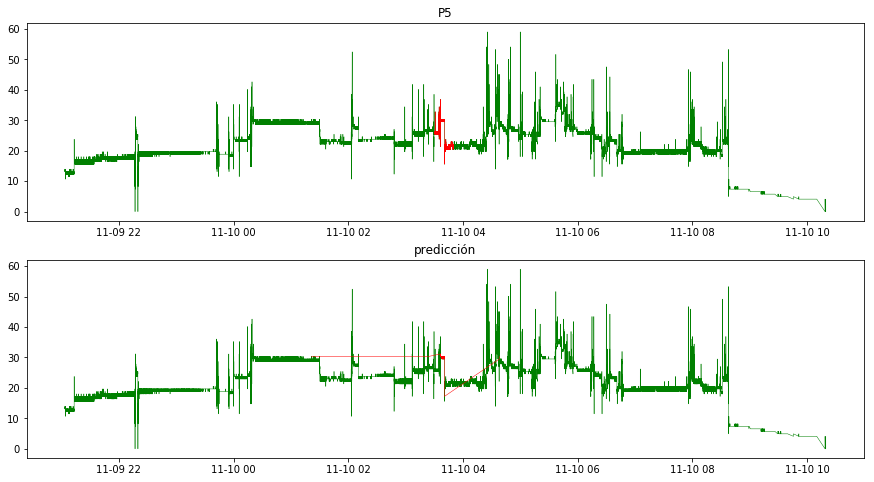

In [38]:
column = 'P5'

# datos de crisis real 
y = np.transpose(diacrisis1['DateTime'])
x = np.transpose(presionesDiaCrisis1[column])
trues = diacrisis1[diacrisis1['target'] == True]
y_trues = np.transpose(trues['DateTime'])
x_trues = np.transpose(trues[column])

# datos de predicción 
trues = diacrisis1[diacrisis1['prediction'] == True]
y_trues_prediction = np.transpose(trues['DateTime'])
x_trues_prediction = np.transpose(trues[column])
                 
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(y,x,linewidth=0.5, c='g')
plt.plot(y_trues, x_trues, linewidth=0.5, c='r')
plt.title(column)
plt.subplot(212)
plt.plot(y,x,linewidth=0.5, c='g')
plt.plot(y_trues_prediction, x_trues_prediction, linewidth=0.5, c='r')
plt.title('predicción')

### - Entrenamiento sin la crisis: 

In [11]:
clf2 = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf2.fit(presionesNoCrisis1)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [12]:
y_pred = clf2.predict(presionesDiaCrisis1)
y_pred

array([-1,  1, -1, ..., -1, -1, -1])

In [13]:
y_pred = np.array([ 0 if y==1 else 1 for y in y_pred])
y_pred = y_pred.astype(np.bool)

In [14]:
y_pred

array([ True, False,  True, ...,  True,  True,  True])

In [15]:
confusion_matrix(diacrisis1['target'].values ,y_pred)

array([[91149, 10865],
       [ 2685,   317]])

In [16]:
diacrisis1['prediction'] = y_pred
diacrisis1.head()

,DateTime,P1,P2,P3,P4,P5,P6,target,prediction
3849685,2018-11-09 21:03:27,4.098361,18.852459,22.131148,22.131148,13.114754,6.557377,False,True
3849686,2018-11-09 21:03:27,4.098361,18.852459,21.311475,22.131148,13.114754,6.557377,False,False
3849687,2018-11-09 21:03:28,4.918033,19.672131,22.131148,22.950820,13.934426,7.377049,False,True
3849688,2018-11-09 21:03:29,4.098361,18.852459,21.311475,22.131148,13.114754,6.557377,False,False
3849689,2018-11-09 21:03:30,0.000000,18.852459,22.131148,22.950820,13.114754,6.557377,False,True


Text(0.5, 1.0, 'predicción')

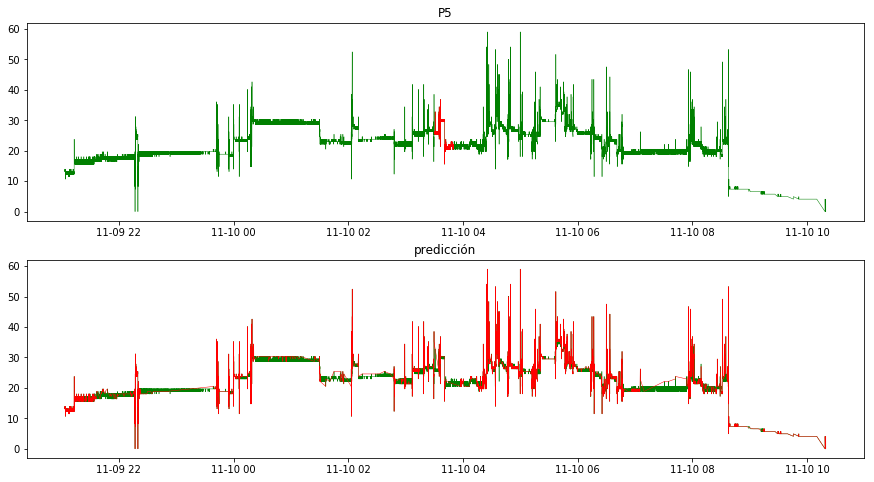

In [17]:
column = 'P5'

# datos de crisis real 
y = np.transpose(diacrisis1['DateTime'])
x = np.transpose(presionesDiaCrisis1[column])
trues = diacrisis1[diacrisis1['target'] == True]
y_trues = np.transpose(trues['DateTime'])
x_trues = np.transpose(trues[column])

# datos de predicción 
trues = diacrisis1[diacrisis1['prediction'] == True]
y_trues_prediction = np.transpose(trues['DateTime'])
x_trues_prediction = np.transpose(trues[column])
                 
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(y,x,linewidth=0.5, c='g')
plt.plot(y_trues, x_trues, linewidth=0.5, c='r')
plt.title(column)
plt.subplot(212)
plt.plot(y,x,linewidth=0.5, c='g')
plt.plot(y_trues_prediction, x_trues_prediction, linewidth=0.5, c='r')
plt.title('predicción')